<a href="https://colab.research.google.com/github/Dntfreitas/Dntfreitas.github.io/blob/master/Python%20Classes/tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Types of Machine-Learning problems:

- **Supervised learning**: Models that can predict labels based on labeled training data
    - **Classification**: Models that predict labels as two or more discrete categories
    - **Regression**: Models that predict continuous labels
- **Unsupervised learning**: Models that identify structure in unlabeled data
    - **Clustering**: Models that detect and identify distinct groups in the data
    - **Dimensionality reduction**: Models that detect and identify lower-dimensional structure in higher-dimensional data
    
All taken from: VanderPlas, Jake. *Python Data Science Handbook: Essential Tools for Working with Data*. O'Reilly Media, Inc., 2016.

# scikit-learn

1. Choose the model to be used:
- E.g.: ``from sklearn.linear_model import LinearRegression``.
2. Choose model hyper-parameters;
- E.g.: ``model = LinearRegression(fit_intercept=True)``.
3. Arrange data into training and testing datasets;
- E.g.: ``X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)``.
4. Fit the data using ``fit()``;
- E.g.: ``model.fit(X_train, y_train)``.
5. Predict data using ``predict()`` or ``transform()``.
- E.g.: ``y_pred_train = reg.predict(X_train)``.
6. Assess the model on training and testing datasets.
- E.g.: ``mse_train = mean_squared_error(y_train, y_pred_train)``.

# Table of contents

- Types of Machine-Learning problems:
- scikit-Learn
- Supervised learning
	- Linear Regression
	- Classification
- Unsupervised learning
	- $K$-means clustering
- Preprocessing data
	- Normalization
	- Standardization
- Model validation
	- Cross-validation
- Grid Search
	- Regression
	- Classification
- Pipeline
	- Intermediate step: How to choose the number of components for the PCA?
- Feature selection
	- Variance threshold
	- Univariate selection
	- Recursive feature elimination
	- Pipeline with feature selection
- Neural networks
	- Classification
	- Cross-validation and grid search
	- Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# just for making plots look professional 😀
import seaborn as sns
sns.set()

# Supervised learning

> Supervised learning refers to any machine learning process that learns a function from an input type to an output type using data comprising examples that have both input and output values. 

> Two typical examples of supervised learning are **classification** learning and **regression**.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Linear Regression

### Ordinary least squares linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [ ]:
X, y = fetch_california_housing(return_X_y=True)  # load the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)  # split in train and test dataset in order to assess the model

In [ ]:
reg = LinearRegression() # ordinary least squares linear regression
reg.fit(X_train, y_train);  # use the train dataset for fitting the model

In [ ]:
y_pred_test = reg.predict(X_test)  # compute the predictions on the test dataset
mse_test = mean_squared_error(y_test, y_pred_test)  # mean of the squared prediction errors (i.e., the difference between the true value and the predicted value for an instance) over all instances in the test set
r2_test = r2_score(y_test, y_pred_test)  # amount of variability that our model can explain (i.e., the best possible score is 1.0)

y_pred_train = reg.predict(X_train)  # compute the prediction on the train dataset
mse_train = mean_squared_error(y_train, y_pred_train)  # mean of the squared prediction errors (i.e., the difference between the true value and the predicted value for an instance) over all instances in the test set
r2_train = r2_score(y_train, y_pred_train)  # amount of variability that our model can explain (i.e., the best possible score is 1.0)

print('Train R2', r2_train, 'Test R2', r2_test)
print('Train MSE', mse_train, 'Test MSE', mse_test)

Train R2 0.6110570052917936 Test R2 0.5942596198560931
Train MSE 0.5173023825048992 Test MSE 0.5415001696009121


## Classification

### Support vector classification

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True)  # load the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)  # split in train and test dataset in order to assess the model

In [ ]:
clf = svm.SVC(kernel='poly', degree=3)  # Support vector classification -- finds a hyperplane that separates the two classes of data with as wide a margin as possible.
clf.fit(X_train, y_train); # use the train dataset for fitting the model

In [ ]:
y_pred_train = clf.predict(X_train)  # compute the prediction on the train dataset
y_pred_test = clf.predict(X_test)  # compute the prediction on the test dataset

acc_train = clf.score(X_train, y_train)  # compute mean accuracy for training
acc_test = clf.score(X_test, y_test)  # compute mean accuracy for testing

print('Train Acc', acc_train, 'Test Acc', acc_test)

Train Acc 0.9095477386934674 Test Acc 0.9122807017543859


In [ ]:
conf_test = confusion_matrix(y_test, y_pred_test) # compute the confusion matrix
conf_test

array([[ 45,  12],
       [  3, 111]])

### Decision Trees

In [ ]:
from sklearn import tree

In [ ]:
# load the data; different way, but the same thing
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
feature_names = breast_cancer.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)  # split in train and test dataset in order to assess the model

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)  # set the tree with a maximum depth of 3
clf = clf.fit(X_train, y_train)

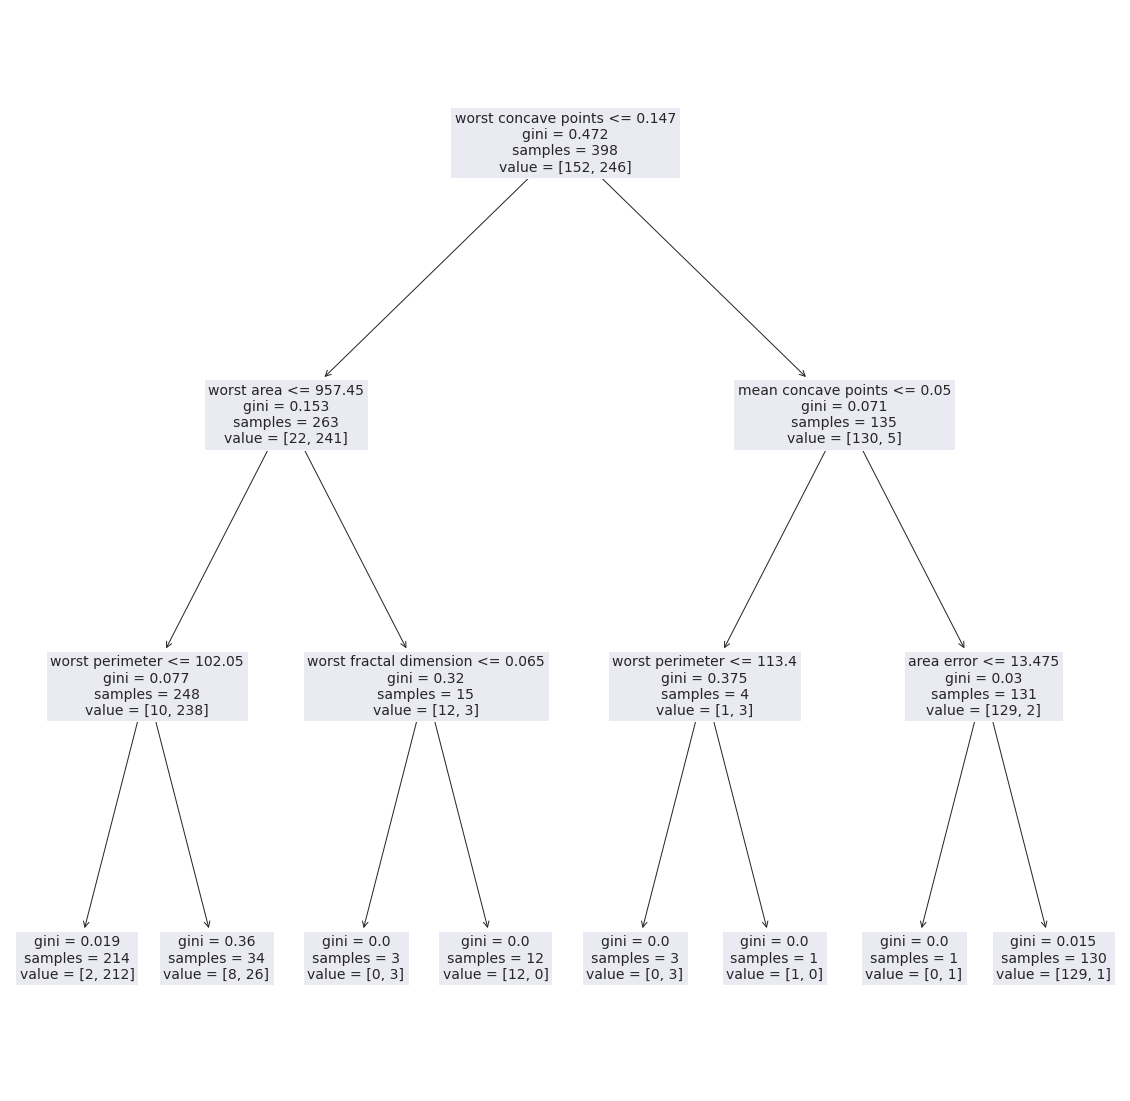

In [ ]:
# Print a visual representation for the training dataset
plt.figure(figsize=(20, 20))
tree.plot_tree(clf, feature_names=feature_names, fontsize=14);
plt.show()

In [ ]:
acc_test = clf.score(X_test, y_test)  # compute mean accuracy for testing
acc_test

0.9298245614035088

In [ ]:
from sklearn.tree import export_text

In [ ]:
print(export_text(clf, feature_names=feature_names.tolist())) # print in a textual manner

|--- worst concave points <= 0.15
|   |--- worst area <= 957.45
|   |   |--- worst perimeter <= 102.05
|   |   |   |--- class: 1
|   |   |--- worst perimeter >  102.05
|   |   |   |--- class: 1
|   |--- worst area >  957.45
|   |   |--- worst fractal dimension <= 0.06
|   |   |   |--- class: 1
|   |   |--- worst fractal dimension >  0.06
|   |   |   |--- class: 0
|--- worst concave points >  0.15
|   |--- mean concave points <= 0.05
|   |   |--- worst perimeter <= 113.40
|   |   |   |--- class: 1
|   |   |--- worst perimeter >  113.40
|   |   |   |--- class: 0
|   |--- mean concave points >  0.05
|   |   |--- area error <= 13.47
|   |   |   |--- class: 1
|   |   |--- area error >  13.47
|   |   |   |--- class: 0



# Unsupervised learning

> Unsupervised learning refers to any machine learning process that seeks to learn structure in the absence of either an identified output (supervised learning) or feedback (reinforcement learning). 

> Three typical examples of unsupervised learning are **clustering**, **association rules**, and **self-organizing maps**.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [ ]:
X_iris, y_iris = load_iris(return_X_y=True) # load the dataset

## $k$-means clustering

In [ ]:
kmeans = KMeans(n_clusters=3) # K-means clustering
kmeans.fit(X_iris)
y_kmeans_iris = kmeans.predict(X_iris)

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing linearly.

### How to choose the number of clusters?

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_classes=4, n_informative=10, n_clusters_per_class=5) # toy dataset for classification

In [ ]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

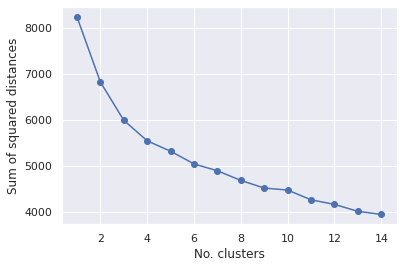

In [ ]:
plt.plot(K, sum_of_squared_distances, 'o-')
plt.xlabel('No. clusters')
plt.ylabel('Sum of squared distances')
plt.show()

## PCA

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

**PCA can also be used as a feature selection method.**

![](https://github.com/Dntfreitas/ann_course/blob/main/Python%20Classes/img/PCA.png?raw=1)

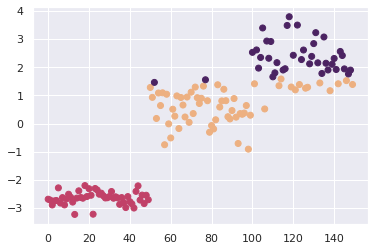

In [ ]:
# Use the PCA process in order to plot the clusters
pca = PCA(n_components=1);
X_transformed = pca.fit_transform(X_iris)

x_plot = np.arange(len(X_iris))
plt.scatter(x_plot, X_transformed, c=y_kmeans_iris, cmap='flare')
plt.show()

# Preprocessing data

> **Normalization** scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision. 

> **Standardization** scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

**Taken from [Machine Learning Mastery](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)**

In [ ]:
X, y = fetch_california_housing(return_X_y=True)  # load the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)  # split in train and test dataset in order to assess the model

## Normalization

In [ ]:
min_max_scaler = MinMaxScaler()
min_max_scaler = min_max_scaler.fit(X_train) # fit the model to compute the min and max values
X_train_new = min_max_scaler.transform(X_train) # transform the train dataset
X_test_new = min_max_scaler.transform(X_test) # transform the test dataset

reg = LinearRegression() # ordinary least squares linear regression
reg.fit(X_train_new, y_train);  # use the train dataset for fitting the model

y_pred_test = reg.predict(X_test_new)  # compute the prediction on the test dataset
mse_test = mean_squared_error(y_test, y_pred_test)  # mean of the squared prediction errors (i.e., the difference between the true value and the predicted value for an instance) over all instances in the test set
r2_test = r2_score(y_test, y_pred_test)  # the amount of variability that our model can explain (i.e., the best possible score is 1.0)

y_pred_train = reg.predict(X_train_new)  # compute the prediction on the train dataset
mse_train = mean_squared_error(y_train, y_pred_train)  # mean of the squared prediction errors (i.e., the difference between the true value and the predicted value for an instance) over all instances in the test set
r2_train = r2_score(y_train, y_pred_train)  # the amount of variability that our model can explain (i.e., the best possible score is 1.0)

print('Train R2', r2_train, 'Test R2', r2_test)
print('Train MSE', mse_train, 'Test MSE', mse_test)

Train R2 0.6125407625048611 Test R2 0.591084544974624
Train MSE 0.5178172571023563 Test MSE 0.5398202803477221


## Standardization 

In [ ]:
std_scaler = StandardScaler()
min_max_scaler = std_scaler.fit(X_train) # fit the model to compute the mean and std values
X_train_new = std_scaler.transform(X_train) # transform the train dataset
X_test_new = std_scaler.transform(X_test) # transform the test dataset

reg = LinearRegression() # ordinary least squares linear regression
reg.fit(X_train_new, y_train);  # use the train dataset for fitting the model

y_pred_test = reg.predict(X_test_new)  # compute the prediction on the test dataset
mse_test = mean_squared_error(y_test,
                              y_pred_test)  # mean of the squared prediction errors (i.e., the difference between the true value and the predicted value for an instance) over all instances in the test set
r2_test = r2_score(y_test,
                   y_pred_test)  # the amount of variability that our model can explain (i.e., the best possible score is 1.0)

y_pred_train = reg.predict(X_train_new)  # compute the prediction on the train dataset
mse_train = mean_squared_error(y_train,
                               y_pred_train)  # mean of the squared prediction errors (i.e., the difference between the true value and the predicted value for an instance) over all instances in the test set
r2_train = r2_score(y_train,
                    y_pred_train)  # the amount of variability that our model can explain (i.e., the best possible score is 1.0)

print('Train R2', r2_train, 'Test R2', r2_test)
print('Train MSE', mse_train, 'Test MSE', mse_test)

Train R2 0.612540762504861 Test R2 0.5910845449746237
Train MSE 0.5178172571023564 Test MSE 0.5398202803477224


# Model validation 

- Holdout sets (like before).
- Cross-validation

## Cross-validation

> One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. In the previous case, half the dataset does not contribute to the training of the model! This is not optimal, and can cause problems—especially if the initial set of training data is small.

> One way to address this is to use cross-validation—that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.

Taken from: VanderPlas, Jake. *Python Data Science Handbook: Essential Tools for Working with Data*. O'Reilly Media, Inc., 2016.

In [ ]:
X, y = fetch_california_housing(return_X_y=True)  # load the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)  # split in train and test dataset in order to assess the model

### Two-fold cross-validation

Split the data into two sets and used each in turn as a validation set.

![](https://github.com/Dntfreitas/ann_course/blob/main/Python%20Classes/img/cross.jpg?raw=1)

In [ ]:
y_1 = LinearRegression().fit(X_train, y_train).predict(X_test) # ordinary least squares linear regression
y_2 = LinearRegression().fit(X_test, y_test).predict(X_train) # ordinary least squares linear regression

mean_squared_error(y_test, y_1), mean_squared_error(y_train, y_2)

(0.521352592590407, 0.5294531302487309)

In [ ]:
np.mean([mean_squared_error(y_test, y_1), mean_squared_error(y_train, y_2)]) # combined error

0.5254028614195689

### $n$-fold cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = LinearRegression() # ordinary least squares linear regression

n_fold = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) # the result the error will be always negative since this function was designed for its use on optimisation algorithms
np.mean(n_fold) # combined error

0.5582901717686806

### Leave-One-Out

The number of folds is equal to the number of data points; that is, we train on all points but one in
each trial. 

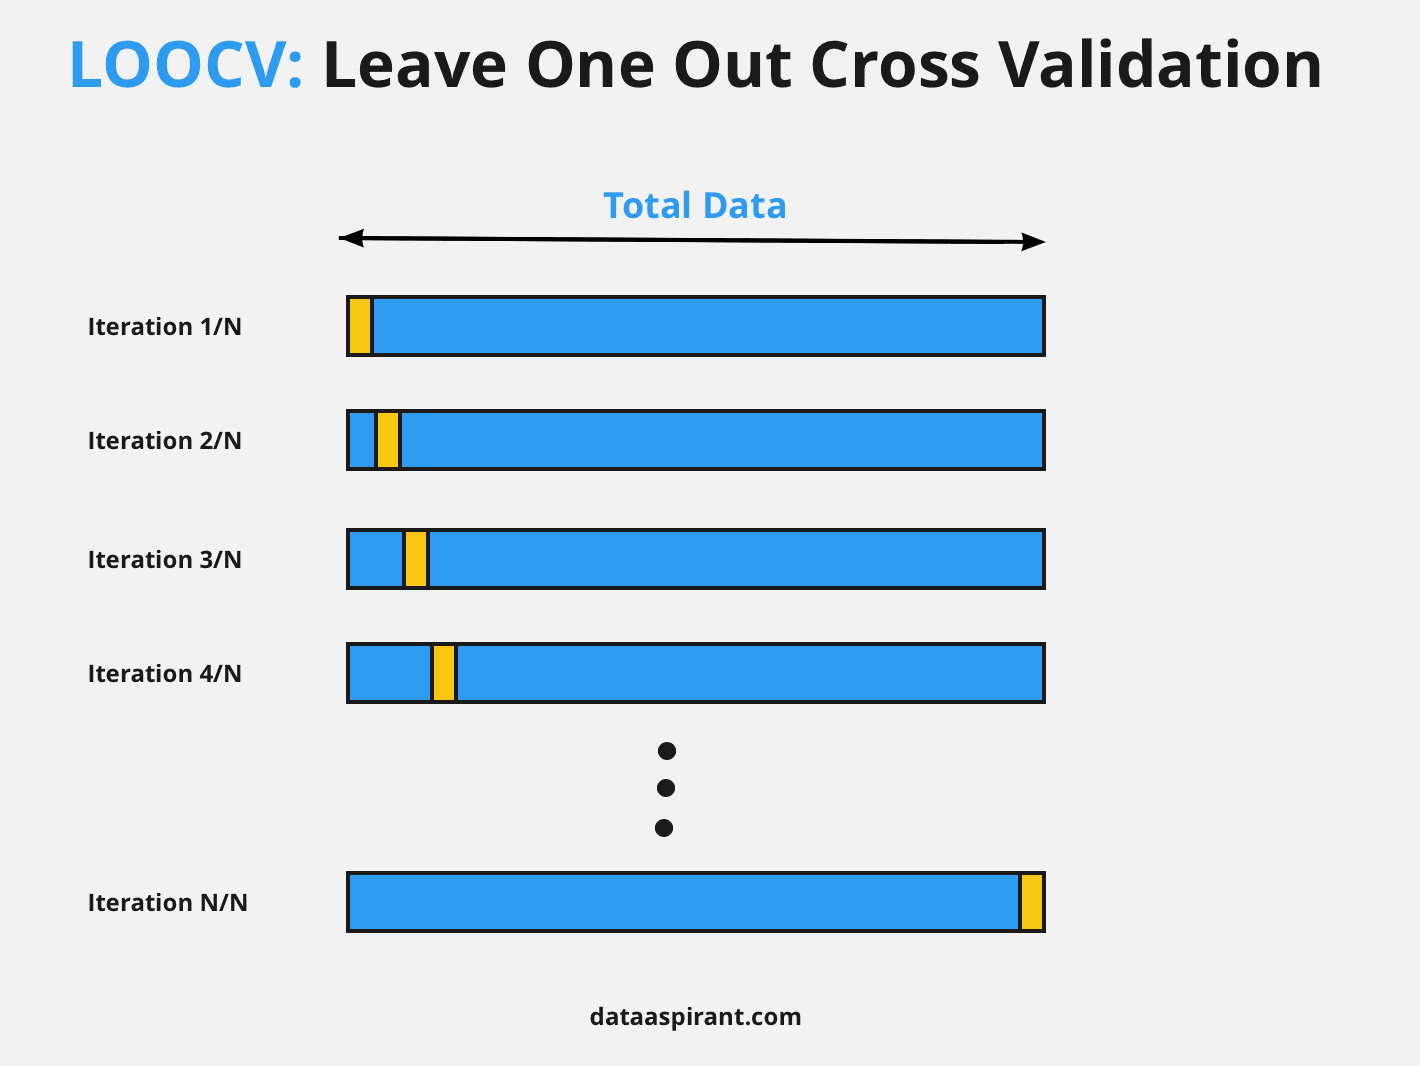

In [ ]:
loo = -cross_val_score(model, X, y, cv=len(X), scoring='neg_mean_squared_error', n_jobs=-1) # the result the error will be always negative since this function was designed for its use on optimisation algorithms
np.mean(loo) # combined error

0.5282462043712458

# Grid Search

It's difficult to test all parameters' combination values for a particular model to find the one that maximizes the validation score.

In [ ]:
from sklearn.model_selection import GridSearchCV

## Regression

In [ ]:
X, y = fetch_california_housing(return_X_y=True)  # load the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)  # split in train and test dataset in order to assess the model

In [ ]:
param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}

In [ ]:
grid = GridSearchCV(LinearRegression(), param_grid, cv=2, n_jobs=-1) # perform grid search with two-fold validation
grid.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
grid.best_params_ # exports the best parameters

{'fit_intercept': True, 'normalize': True}

In [ ]:
y_pred_train = grid.predict(X_train)  # compute the prediction on the train dataset
mse_train = mean_squared_error(y_train, y_pred_train)  # mean of the squared prediction errors (i.e., the difference between the true value and the predicted value for an instance) over all instances in the test set
r2_train = r2_score(y_train, y_pred_train)  # the amount of variability that our model can explain (i.e., the best possible score is 1.0)

y_pred_test = grid.predict(X_test)  # compute the prediction on the test dataset
mse_test = mean_squared_error(y_test, y_pred_test)  # mean of the squared prediction errors (i.e., the difference between the true value and the predicted value for an instance) over all instances in the test set
r2_test = r2_score(y_test, y_pred_test)  # the amount of variability that our model can explain (i.e., the best possible score is 1.0)

print('Train R2', r2_train, 'Test R2', r2_test)
print('Train MSE', mse_train, 'Test MSE', mse_test)

Train R2 0.6055268089043857 Test R2 0.6043957421808925
Train MSE 0.5220043228666617 Test MSE 0.5343872136997112


## Classification

In [ ]:
X, y = load_breast_cancer(return_X_y=True)  # load the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)  # split in train and test dataset in order to assess the model

In [ ]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'shrinking': [True, False]}

In [ ]:
grid = GridSearchCV(svm.SVC(), param_grid, cv=2, n_jobs=-1)
grid.fit(X_train, y_train);

In [ ]:
grid.best_params_

{'kernel': 'linear', 'shrinking': True}

In [ ]:
acc_test = grid.score(X_test, y_test)  # compute mean accuracy for testing

print('Test Acc', acc_test)

Test Acc 0.9473684210526315


# Pipeline

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_lfw_people

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)  # fetch the data

In [ ]:
# load the data; different way, but the same thing
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_samples, h, w = lfw_people.images.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # split the data into training and test dataset

## Intermediate step: How to choose the number of components for the PCA?

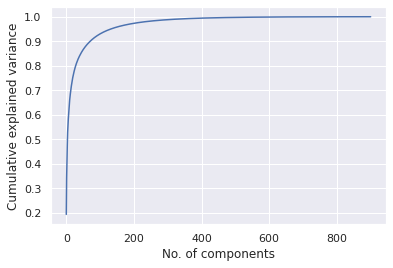

In [ ]:
# Choose the number of components
pca = PCA().fit(X_train) # by default, it will use all features
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # compute the cumulative sum 
plt.xlabel('No. of components')
plt.ylabel('Cumulative explained variance');

In [ ]:
# Apply PCA
pca = PCA(n_components=150).fit(X_train)

X_train_pca = pca.transform(X_train) # reduce the features on the train dataset
X_test_pca = pca.transform(X_test) # reduce the features on the train dataset

In [ ]:
# Find the best configuration
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'shrinking': [True, False],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}

grid = GridSearchCV(svm.SVC(), param_grid, cv=2, n_jobs=-1) # perform grid search with two-fold validation
grid.fit(X_train_pca, y_train);

grid.best_params_

{'gamma': 0.0001, 'kernel': 'linear', 'shrinking': True}

In [ ]:
model = grid.best_estimator_

In [ ]:
# Create and apply a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', model)])
pipe.fit(X_train_pca, y_train);

In [ ]:
y_pred = pipe.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.62      0.68        29
     Colin Powell       0.68      0.75      0.71        64
  Donald Rumsfeld       0.63      0.81      0.71        32
    George W Bush       0.86      0.82      0.84       155
Gerhard Schroeder       0.72      0.74      0.73        31
      Hugo Chavez       0.88      0.82      0.85        28
       Tony Blair       0.74      0.71      0.72        48

         accuracy                           0.77       387
        macro avg       0.75      0.75      0.75       387
     weighted avg       0.78      0.77      0.77       387



In [ ]:
def plot_from_sample(samples, h, w, labels=None, cmap=plt.cm.gray):
    """Function to plot images from an numpy array."""
    for i in range(len(samples)):
        sample = samples[i]
        plt.subplot(1, len(samples), i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(sample.reshape(h, w), cmap=cmap)
        if labels is not None:
            plt.xlabel(labels[i])

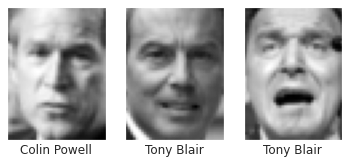

In [ ]:
figures = np.random.randint(0, len(X_test), size=3) # select 3 random images

plot_from_sample(X_test[figures], h, w, labels=target_names[y_pred[figures]])

# Feature selection

Why use feature selection?
- **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.
- **Improves Accuracy**: Less misleading data means modeling accuracy improves.
- **Reduces Training Time**: Fewer data means that algorithms train faster.

In [ ]:
boston = load_boston()  # load the dataset

NameError: ignored

In [ ]:
print(boston['DESCR'])

In [ ]:
# load the data; different way, but the same thing
X = boston.data
y = boston.target
feature_names = boston.feature_names

## Variance threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
selector = VarianceThreshold(threshold=1) # drop features with a variance lower than 1
X_new = selector.fit_transform(X)

In [ ]:
print('Selected features:', feature_names[selector.get_support()])
print('Dropped features:', feature_names[~selector.get_support()])

## Univariate selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. 

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
selector = SelectKBest(score_func=f_regression)
X_new = selector.fit_transform(X, y)

In [ ]:
print('Selected features:', feature_names[selector.get_support()])
print('Dropped features:', feature_names[~selector.get_support()])

## Recursive feature elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
estimator = LinearRegression() # ordinary least squares linear regression
selector = RFECV(estimator, step=1, cv=2, verbose=True, n_jobs=-1) # perform two-fold recursive feature elimination using all cores

In [ ]:
selector = selector.fit(X, y)

In [ ]:
print('Selected features:', feature_names[selector.get_support()])
print('Dropped features:', feature_names[~selector.get_support()])

## Pipeline with feature selection

In [ ]:
clf = Pipeline([
    ('feature_selection', VarianceThreshold(threshold=1)),
    ('classification', LinearRegression())
])
clf.fit(X, y);

# Neural networks with scikit-Learn

scikit-learn offers two functions for neural networks:
- ``MLPClassifier``: Implements a multilayer perceptron (MLP) for classification. 
- ``MLPRegressor``: Implements MLP for regression problems.

It also has **different solvers**:
- L-BFGS: Use for small datasets.
- Adam: Use for large datasets.
- SGD: Excels at most problems if you correctly set some special parameters.

In [ ]:
from tqdm import tqdm
import pandas as pd

**Note**: In order to use ``tqdm``, you have to run the following command in the Anconda terminal: ``conda install -c conda-forge tqdm``, and restart the kernel.

## Classification

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits

In [ ]:
X, y = load_digits(return_X_y=True) # load the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # split the data into training and test dataset

In [ ]:
# Get some attributes for using latter
no_samples, no_inputs = X.shape
no_outputs = len(np.unique(y))

In [ ]:
figures = np.random.randint(0, len(X), size=7) # select 7 random images
plot_from_sample(X[figures], 8, 8, labels=y[figures], cmap=plt.cm.binary)

The ANN will have the following output:

![](https://github.com/Dntfreitas/ann_course/blob/main/Python%20Classes/img/classification.png?raw=1)

### Data pre-processing

Lets apply data-normalization.

In [ ]:
scaler = MinMaxScaler(feature_range=(0.01, 1))
scaler.fit(X_train) # fit only on the train dataset

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train all models

In [ ]:
solvers = ['lbfgs', 'sgd', 'adam']
hidden_layer_sizess = [25, 50, 100]
early_stopping = True
max_iter = 5000
validation_fraction = 0.15
no_repetitions = 5

In [ ]:
nets = []

with tqdm(total=len(solvers) * len(hidden_layer_sizess) * no_repetitions) as pbar:
    # foreach solver
    for solver in solvers:
        # foreach number of hidden units
        for hidden_layer_sizes in hidden_layer_sizess:
            for _ in range(no_repetitions):
                nn = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='logistic', solver=solver, early_stopping=early_stopping, max_iter=max_iter, validation_fraction=validation_fraction) # create the classifier
                nn.fit(X_train_scaled, y_train) # fit the classifier using the train dataset

                nets.append(nn) # save the ANN

                pbar.update(1) # update progress bar

### Test and analyse all models

In [ ]:
overall_results = []

for net in nets:
    
    score = net.score(X_test_scaled, y_test) # compute mean accuracy for testing

    # save the network's results
    parameters = net.get_params()
    parameters['Accuracy in Test'] = score

    # save the network's results
    overall_results.append(parameters)

overall_results_pd = pd.DataFrame(overall_results)  # convert to dataframe

In [ ]:
table_results = overall_results_pd.groupby(['solver', 'hidden_layer_sizes']).aggregate([min, max, np.mean, np.std])['Accuracy in Test'].sort_values(by=['max', 'hidden_layer_sizes', 'min', 'std'], ascending=[False, True, False, True])
table_results

In [ ]:
print(table_results.to_latex(float_format='{:0.2f}'.format))  # just curiosity

## Cross-validation and grid search

In [ ]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)  # split in train and test dataset in order to assess the model

In [ ]:
# Apply the MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [ ]:
param_grid = {'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'learning_rate_init': [0.001, 0.01, 0.1],
              'momentum': [0.1, 0.5, 0.9]
              }

In [ ]:
grid = GridSearchCV(MLPClassifier(solver='sgd', hidden_layer_sizes=[10], max_iter=1000), param_grid, cv=2, n_jobs=-1) # perform grid search with two-fold validation
grid.fit(X_train_scaled, y_train);

In [ ]:
grid.best_params_

In [ ]:
cv = cross_val_score(grid, X_train_scaled, y_train, cv=3, n_jobs=-1)
test_score = grid.score(X_test_scaled, y_test)
print('CV accuracy score: %0.3f' % np.mean(cv))
print('Test accuracy score: %0.3f' % test_score)

## Regression

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
# load the data; different way, but the same thing
X = boston.data
y = boston.target
feature_names = boston.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)  # split in train and test dataset in order to assess the model

In [ ]:
no_features = [2, 4, 8]

pipe = Pipeline([
    # the reduce_dim stage is populated by the param_grid
    ('reduce_dim', 'passthrough'),
    ('classify', MLPRegressor(max_iter=5000))
])

In [ ]:
no_features = [2, 4, 8]

param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': no_features
    },
    {
        'reduce_dim': [SelectKBest(f_regression)],
        'reduce_dim__k': no_features
    }
]

In [ ]:
grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1, cv=2)
grid.fit(X_train, y_train);

In [ ]:
grid.best_params_

### Feature selection

In [ ]:
selector = grid.best_params_['reduce_dim']
X_new_train = selector.fit_transform(X_train, y_train)

In [ ]:
print('Dropped features:', feature_names[~selector.get_support()])

In [ ]:
selected_features = selector.get_support(indices=True)

In [ ]:
X_new_test = X_test[:, selected_features]

### Train all models

In [ ]:
solvers = ['lbfgs', 'sgd', 'adam']
hidden_layer_sizess = [10, 15, 20]
early_stopping = True
max_iter = 5000
validation_fraction = 0.15
no_repetitions = 5

In [ ]:
nets = []

with tqdm(total=len(solvers) * len(hidden_layer_sizess) * no_repetitions) as pbar:
    # foreach solver
    for solver in solvers:
        # foreach number of hidden units
        for hidden_layer_sizes in hidden_layer_sizess:
            for _ in range(no_repetitions):
                nn = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='tanh', solver=solver, early_stopping=early_stopping, max_iter=max_iter, validation_fraction=validation_fraction)
                nn.fit(X_new_train, y_train) # fit the classifier using the train dataset

                nets.append(nn) # save the ANN

                pbar.update(1) # update progress bar

### Test and analyse all models

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
overall_results = []

for net in nets:
    y_pred = net.predict(X_new_test)

    parameters = net.get_params()
    parameters['Mean absolute percentage error'] = mean_absolute_percentage_error(y_test, y_pred) * 100

    overall_results.append(parameters)

overall_results_pd = pd.DataFrame(overall_results)  # convert to dataframe

In [ ]:
table_results = overall_results_pd.groupby(['solver', 'hidden_layer_sizes']).aggregate([min, max, np.mean, np.std])['Mean absolute percentage error'].sort_values(by=['min', 'hidden_layer_sizes', 'max', 'std'])
table_results

### Select the best network and export it using Pickle

In [ ]:
from joblib import dump, load

In [ ]:
pos_min_error = overall_results_pd['Mean absolute percentage error'].argmin()

In [ ]:
best_net = nets[pos_min_error]
best_net

In [ ]:
dump(best_net, 'best_net.joblib')

In [ ]:
best_net_loaded = load('best_net.joblib')

In [ ]:
best_net_loaded

## Extra: Plot loss curves

In [ ]:
nn_sgd = MLPRegressor(hidden_layer_sizes=[15, 15], activation='tanh', solver='sgd', max_iter=max_iter)
nn_sgd.fit(X, y);

nn_adam = MLPRegressor(hidden_layer_sizes=[15, 15], activation='tanh', solver='adam', max_iter=max_iter)
nn_adam.fit(X, y);

In [ ]:
ax = plt.axes()

plt.plot(nn_sgd.loss_curve_, label='SGD')
plt.plot(nn_adam.loss_curve_, label='ADAM')

ax.legend();

plt.xlabel('i')
plt.ylabel('Loss')

plt.show()

# Neural networks with TensorFlow



---

**STOP HERE:** Do the following: Runtime > Change runtime type > Select GPU for the hardware accelerator.

---



TensorFlow’s interface is Python, but its core functionality is written in C++ for improved performance. TensorFlow code can be deployed to a GPU, a remote system, a network of remote systems, or even mobile and edge devices.

**Google Colab already comes with VMs with TensorFlow installed (for CPU and GPU execution).**


In [ ]:
import tensorflow as tf
import numpy as np

## Tensors

The primary data type of TensorFlow is the tensors. A Tensor instance is an n-dimensional array that contains numeric or string data. 

A zero-dimensional tensor is called a scalar, a one-dimensional tensor is called a vector, and a two-dimensional tensor is called a matrix.

A tensor may contain numbers, strings, or Boolean values. Like NumPy, every element of a tensor must have the same type.

### Create a Tensor

In [ ]:
t = tf.constant([1, 2, 3, 4])
t

In [ ]:
zeros_t = tf.zeros((3, 3))  # it is always good practice allocating memory beforehand
print(zeros_t)

In [ ]:
# Tensors can also be created from NumPy arrays
t = tf.constant(np.array([[0, 1, 2], [3, 4, 5]]))
t.shape

In [ ]:
# NumPy arrays can also be created from Tensors
arr = np.array(t)

In [ ]:
# TensorFlow has some functions also to generate Tensors
t = tf.range(0, 10, delta=0.5)
print(t)
t = tf.random.normal((4, 4))
print(t)

### Indexing

In [ ]:
t = tf.range(0, 10)
t

In [ ]:
t.numpy()[0] # get the first element

In [ ]:
t.numpy()[-1] # get the last element

In [ ]:
t.numpy()[2:] # get elements from position 2 forward

In [ ]:
t.numpy()[1:3] # get elements from position 1 to position 2

#### Multi-dimensional indexing

In [ ]:
t_multi = tf.constant([[1, 2, 3],
                       [4, 5, 6]])

In [ ]:
t_multi.numpy()[:, 0]  # extract the first column

In [ ]:
t_multi.numpy()[:, -1]  # extract the last column

### Tensor attributes

In [ ]:
t_multi = tf.constant([[1, 2, 3],
                       [4, 5, 6]])

In [ ]:
t_multi.ndim # number of dimensions

In [ ]:
t_multi.shape # shape

In [ ]:
tf.size(t_multi).numpy() # number of elements

#### Typical axis order

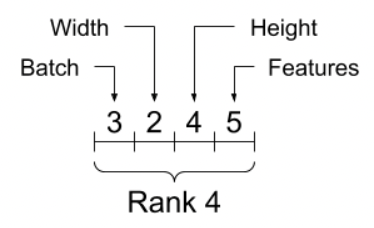

### Reshaping

In [ ]:
t_multi = tf.constant([[1, 2, 3, 4],
                      [5, 6, 7, 8],
                      [9, 10, 11, 12]])

In [ ]:
t_multi.shape  # get the shape of the array. In this case, 3 rows of 4 columns

In [ ]:
tf.reshape(t_multi, (2, -1))  # reshape the array for two rows. The number of columns is inferred

In [ ]:
tf.reshape(t_multi, (-1, 2))  # reshape the array for two columns. The number of rows is inferred

In [ ]:
tf.reshape(t_multi, (4, 3))  # reshape the array for 4 rows and 3 columns

### Vectorized functions

In [ ]:
t1 = tf.random.normal((10,10))
t2 = tf.random.normal((10,10))

In [ ]:
t1 + t2 # element-wise addition

In [ ]:
t1 * t2 # element-wise multiplication

In [ ]:
t1 @ t2 # matrix multiplication

In [ ]:
tf.math.log(t1)

In [ ]:
np.mean(t1) # NumPy vectorized functions can be still applied with TensorFlow

In [ ]:
np.mean(t1)

## Simple example

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Create some dummy data
X = tf.constant([1, 2, 3, 4, 5, 6])
y = tf.constant([3, 5, 7, 9, 11, 13])

In [ ]:
# Create the model with 5 hidden unit
model = keras.Sequential(
    [
     layers.InputLayer(input_shape=(1,)),
     layers.Dense(5, activation='relu', name='hidden'),
     layers.Dense(1, name='output'),
    ]
)

In [ ]:
# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_percentage_error'])

In [ ]:
# Check to see if the model is what we pretend
model.summary()

In [ ]:
# Let's train the model
model.fit(X, y, epochs=25)

In [ ]:
# Evaluate the model
model.evaluate(X, y)

In [ ]:
# Make predictions
model(X)

## Digit classification

The MNIST database contains 60,000 training images and 10,000 testing images of handwritten digits.

Each image in the MNIST dataset is a 28x28 grayscale image containing a digit from 0 to 9, and a label identifying which digit is in the image.

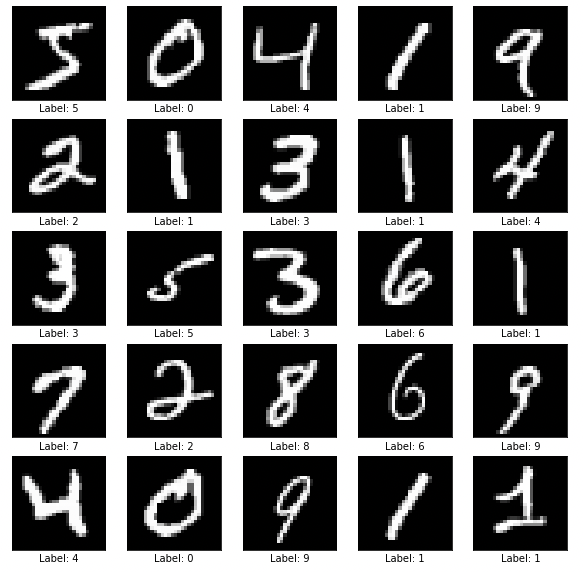

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# Extract a validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.15)

### Data pre-processing

In [ ]:
# Let's normalize all the datasets
X_train_scaled = tf.keras.utils.normalize(X_train)
X_test_scaled = tf.keras.utils.normalize(X_test)
X_val_scaled = tf.keras.utils.normalize(X_val)

### Data augmentation

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.25,
        height_shift_range=0.25,
        shear_range=0.25,
        zoom_range=0.2
)

# Add a color dimension to the images 
X_train_scaled = np.expand_dims(X_train_scaled, axis=3)
# Generate augmented data from MNIST dataset
X_train_generator = data_generator.flow(X_train_scaled, y_train)

### Model creation, fit and test

In [ ]:
# Create the model
n_output_labes = len(np.unique(y_train))
input_shape = X_train_scaled.shape[1:]
model = keras.Sequential(
    [
     layers.InputLayer(input_shape=input_shape),
     layers.Flatten(),
     layers.Dense(100, activation='relu', name='hidden_1'),
     layers.Dense(100, activation='relu', name='hidden_2'),
     layers.Dense(n_output_labes, activation='softmax', name='output'),
    ]
)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Check to see if the model is what we pretend
model.summary()

In [ ]:
# Let's train the model
model.fit(X_train_generator, batch_size=500, epochs=4, validation_data=(X_val_scaled, y_val))

In [ ]:
# Evaluate the model
model.evaluate(X_test_scaled, y_test)

## Transfer Learning (cats *vs.* dogs)

The idea is after a person has learned to perform some task, learning a new but related task is usually easier because knowledge of the first learning episode is transferred to the new task.

So we can use an already trained neural network and train just a part of the network with our data. The already trained neural network can be seen as a feature extraction mechanism.


In [ ]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [ ]:
(train_examples, validation_examples, test_examples), info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True, split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'])

num_examples = info.splits['train'].num_examples  # Gets the total number of samples
num_classes = info.features['label'].num_classes  # Gets the total number of labels

### Data pre-processing

In [ ]:
BATCH_SIZE = 32  #@param {type:"integer"}
IMAGE_SIZE = (224, 224)

# Let's resize, normalize and split the dataset by batches (both training, validation and testing datasets)
def format_image(image, label_id):
    image = tf.image.resize(image, IMAGE_SIZE) / 255.0
    return image, label_id


train_batches = train_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_image).batch(1)
test_batches = test_examples.map(format_image).batch(1)

### Model creation, fit and test

In [ ]:
# Let's download the model from TensorFlow Hub
url_to_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# The layer that we are going to create can be seen as feature extraction layer
feature_extractor = hub.KerasLayer(url_to_model, output_shape=[1280], trainable=False, input_shape=IMAGE_SIZE + (3,), name='mobilenet')

In [ ]:
# The following is to create the model
model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Check to see if the model is what we pretend
model.summary()

In [ ]:
# Let's train the model
model.fit(train_batches, epochs=5, validation_data=validation_batches)

In [ ]:
# Evaluate the model
model.evaluate(test_batches)

## California housing prediction

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn import preprocessing
import datetime, os

# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# Extract a validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.15)

### Data pre-processing

In [ ]:
# Perform data standardization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)
X_val_standardized = scaler.transform(X_val)

### Model creation, fit and test

In [ ]:
# Create the model
input_shape = X_train_standardized.shape[1:]
model = keras.Sequential(
    [
     layers.InputLayer(input_shape=input_shape),
     layers.Dense(100, activation='relu', name='hidden_1'),
     layers.Dropout(0.1),
     layers.Dense(100, activation='relu', name='hidden_2'),
     layers.Dropout(0.1),
     layers.Dense(1, activation='linear', name='output'),
    ]
)

In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_percentage_error'])

In [ ]:
# Check to see if the model is what we pretend
model.summary()

In [ ]:
# This is just for avoiding overfitting
class EarlyStoppingAtMinLoss(keras.callbacks.Callback):

    def __init__(self, patience=0):
        super(EarlyStoppingAtMinLoss, self).__init__()
        self.patience = patience
        # best_weights to store the weights at which the minimum loss occurs.
        self.best_weights = None

    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best as infinity.
        self.best = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("val_loss")
        if np.less(current, self.best):
            self.best = current
            self.wait = 0
            # Record the best weights if current results is better (less).
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                self.model.set_weights(self.best_weights)

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))

In [ ]:
# Set log's structure and callbacks
logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


# Let's train the model
history = model.fit(X_train_standardized, y_train, epochs=50, validation_data=(X_val_standardized, y_val), callbacks=[EarlyStoppingAtMinLoss(patience=5), tensorboard_callback], verbose=0)

In [ ]:
# Start TensorBoard 
%tensorboard --logdir logs